# Web scraping for allrecipes.com project: By collection

Use functions imported from another file.<br>

## Properties:
- input = id numbers for recipe collections<br>
where collections can be accessed at: allrecipes.com/recipes/id_no/<br><br>
- output =
    - (1) pandas dataframe with all recipe data
    - (2) wordcloud jpeg images

## Workflow

1. Provide recipe collection (cuisine) id's<br>
    - input = thought  
    - output = a list of id numbers<br><br>
1. Retrieve html pages that contain recipe collections - save as a file<br>
    - input 1 = a list of recipe collection id numbers
    - input 2 = a new filename to use when saving
    - output 1 = a dictionary with key = collection name; value = html page for that collection
    - output 2 = a file that contains html text for all collections<br><br>
1. Read in the file that contains recipe collection html pages<br>
    - input = filename for the file that contains html text for all collections
    - output = a dictionary with key = collection name; value = html page for that collection<br><br>
1. Extract links to recipes from the recipe collection pages<br>
    - input = a dictionary with key = collection name; value = html page for that collection
    - output = a dictionary with key = collection name; value = a list of links that lead to recipes for that collection<br><br>
1. For each recipe type (collection): Retrieve html pages for the individual recipes - save as separate files for each recipe type<br>
    - input 1 = a dictionary with key = collection name; value = a list of links that lead to recipes for that collection
    - input 2 = a new filename to use when saving
    - output 1 = a dictionary with key = collection name; value = a list of html text for all recipes for that collection
    - output 2 = files that contain hmtl text for recipes, one file per collection, file name reflects the collection<br><br>
1. For each recipe type (collection): Read in the file that contains html recipes<br>
    - input = filename for the file that contains html text for all recipes
    - output = a dictionary with key = collection name; value = a list for all recipes within the collection, with element = html text for a recipe<br><br>
1. For each html recipe of a particular type: extract useful information - then join all information into one pandas dataframe (one row)<br>
(to be looped over all recipes for each collection; over all collections)<br>
    - input = a dictionary with key = collection name; value = a list for all recipes within the collection, with element = html text for a recipe
    - output = a pandas dataframe with columns = useful recipe features; only has a single row = individual recipe<br><br>
1. Make one giant pandas dataframe for all recipes from all collections - just add a column "collection" to individual recipe dataframes and join them together<br>
    - input = lots of pandas dataframes with columns = useful recipe features; each df only has a single row = individual recipe
    - output = a pandas dataframe with columns = useful recipe features including a column "collection"; rows = individual recipes from all collections<br><br>
1. For each recipe type (collection): Make wordclouds for interesting columns in the joint pandas dataframe<br>
    - input = a pandas dataframe with columns = useful recipe features; rows = individual recipes
    - output = wordcloud images, displayed & saved as jpeg files<br><br>

***
Separate jupyter notebook

1. Future: Do some language analysis for text columns<br>
    - input = a pandas dataframe with columns = useful recipe features; rows = individual recipes
    - output = tbd<br><br>
1. Future: Predict number of stars / ratings / reviews<br>
    - input = a pandas dataframe with columns = useful recipe features; rows = individual recipes
    - output = predicted number of stars / ratings / reviews for recipes in the pandas dataframe<br><br>

***
Extra notes<br>
1. Need to insert LOTS of exceptions or sth
1. Basically, if some field is empty, just use "NaN" and move on or sth

## Import packages / setup

In [2]:
# import public things

# general / random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipynb
import re # for string parsing / editing
import string # for string parsing / editing
from datetime import datetime
import time
import random
from pathlib import Path
import ast

# for html
import requests # for getting html off the web
from bs4 import BeautifulSoup # for parsing html
import json

# for ML
from wordcloud import WordCloud, STOPWORDS
import snowballstemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import NMF

# import functions from my functions file
import ipynb.fs.full.functions as funcs

# update a module if it's been edited
# (this is just going around a jupyter feature where simply re-importing doesn't do anything)
# https://support.enthought.com/hc/en-us/articles/204469240-Jupyter-IPython-After-editing-a-module-changes-are-not-effective-without-kernel-restart
import importlib
importlib.reload(funcs)

# other useful settings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5)

## The actual workflow

In [2]:
# 1. Provide recipe collection (cuisine) id's

# input = thought
start_id = 720
stop_id = 722

# output
cuisine_ids = list(range(start_id, stop_id+1))

In [3]:
# just to check
print(cuisine_ids)

[720, 721, 722]


In [4]:
# 2. Retrieve html pages that contain recipe collections - save as a file

# input
name_to_save = 'data/collections_pages'

# output
collection_pages_list = funcs.retrieve_collections_from_id_list(cuisine_ids, name_to_save)

In [5]:
# just to check
print(len(collection_pages_list))
print(collection_pages_list[0])

3
<!DOCTYPE html>
<html lang="en">
<head>
<title>Dutch Recipes | Allrecipes</title>
<meta charset="utf-8"/>
<link href="/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
<link href="/img/favicons/favicon-32.png" rel="icon" sizes="32x32"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="/img/favicons/favicon-57.png" rel="apple-touch-icon"/>
<link href="/img/favicons/favicon-57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/img/favicons/favicon-72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/img/favicons/favicon-76.png" rel="apple-touch-icon" sizes="76x76"/>
<link href="/img/favicons/favicon-114.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/img/favicons/favicon-120.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="/img/favicons/favicon-144.png" rel="apple-touch-icon" sizes="144x144"/>
<link href="/img/favicons/favicon-152.png" rel="apple-touch-icon" sizes="152x152"/>
<link href="/img/favicons/favicon-180.png"

In [6]:
# 3. Read in the file that contains recipe collection html pages
# NB this is not needed if you're just continuing straight from Step 2 and have collection_pages_list already available

# input
file_to_read = name_to_save

# output
collection_pages_list = funcs.load_html_pages_from_file(file_to_read)

Length of the page_list is  3


In [7]:
# just to check
print(collection_pages_list[0])
print(type(collection_pages_list[0]))

<!DOCTYPE html>
<html lang="en">
<head>
<title>Dutch Recipes | Allrecipes</title>
<meta charset="utf-8"/>
<link href="/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
<link href="/img/favicons/favicon-32.png" rel="icon" sizes="32x32"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="/img/favicons/favicon-57.png" rel="apple-touch-icon"/>
<link href="/img/favicons/favicon-57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/img/favicons/favicon-72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/img/favicons/favicon-76.png" rel="apple-touch-icon" sizes="76x76"/>
<link href="/img/favicons/favicon-114.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/img/favicons/favicon-120.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="/img/favicons/favicon-144.png" rel="apple-touch-icon" sizes="144x144"/>
<link href="/img/favicons/favicon-152.png" rel="apple-touch-icon" sizes="152x152"/>
<link href="/img/favicons/favicon-180.png" r

In [8]:
# 4. Extract links to recipes from the recipe collection pages
# recipe collections aka cuisines aka recipe types

# input
collection_pages_list

# let's extract a list of links for each cuisine and add it to dictionary
# key = collection name
# value = a list of recipe links for that collection

recipe_links_by_collection_dict = {}
for page in collection_pages_list:
    #page = BeautifulSoup(page)
    # get the collection name
    collection_name = funcs.extract_a_collection_name_from_an_html_page(page)
    # get the links
    links_from_collection = funcs.extract_all_recipe_links_from_html_file(page)    
    # add the list of links for this one particular cuisine to the dictionary
    recipe_links_by_collection_dict[collection_name] = links_from_collection

# output
recipe_links_by_collection_dict

{'Dutch': ['https://www.allrecipes.com/recipe/11433/banket/',
  'https://www.allrecipes.com/recipe/68583/dutch-croquetten/',
  'https://www.allrecipes.com/recipe/220626/dutch-potato-salad-huzaren-salade/',
  'https://www.allrecipes.com/recipe/9524/dutch-cookies/',
  'https://www.allrecipes.com/recipe/283744/poffertjes-dutch-mini-pancakes/',
  'https://www.allrecipes.com/recipe/15683/dutch-apple-pie-with-oatmeal-streusel/',
  'https://www.allrecipes.com/recipe/139069/boterkoek-dutch-butter-cake/',
  'https://www.allrecipes.com/recipe/79797/stroopwafels/',
  'https://www.allrecipes.com/recipe/246572/stroopwafels-with-treacle/',
  'https://www.allrecipes.com/recipe/258330/appeltaart-dutch-apple-tart/',
  'https://www.allrecipes.com/recipe/7619/dutch-apple-cake/',
  'https://www.allrecipes.com/recipe/12191/dutch-apple-pie/',
  'https://www.allrecipes.com/recipe/215594/lahmacun-turkish-pizza/',
  'https://www.allrecipes.com/recipe/238440/gehakt-ballen-dutch-meatballs/',
  'https://www.allre

In [9]:
# just to check
for key in recipe_links_by_collection_dict:
    print(key)

Dutch
French
German


In [10]:
# just to check
recipe_links_by_collection_dict

{'Dutch': ['https://www.allrecipes.com/recipe/11433/banket/',
  'https://www.allrecipes.com/recipe/68583/dutch-croquetten/',
  'https://www.allrecipes.com/recipe/220626/dutch-potato-salad-huzaren-salade/',
  'https://www.allrecipes.com/recipe/9524/dutch-cookies/',
  'https://www.allrecipes.com/recipe/283744/poffertjes-dutch-mini-pancakes/',
  'https://www.allrecipes.com/recipe/15683/dutch-apple-pie-with-oatmeal-streusel/',
  'https://www.allrecipes.com/recipe/139069/boterkoek-dutch-butter-cake/',
  'https://www.allrecipes.com/recipe/79797/stroopwafels/',
  'https://www.allrecipes.com/recipe/246572/stroopwafels-with-treacle/',
  'https://www.allrecipes.com/recipe/258330/appeltaart-dutch-apple-tart/',
  'https://www.allrecipes.com/recipe/7619/dutch-apple-cake/',
  'https://www.allrecipes.com/recipe/12191/dutch-apple-pie/',
  'https://www.allrecipes.com/recipe/215594/lahmacun-turkish-pizza/',
  'https://www.allrecipes.com/recipe/238440/gehakt-ballen-dutch-meatballs/',
  'https://www.allre

In [11]:
# 5. For each recipe type (collection): Retrieve html pages for the individual recipes
# - save as separate files for each recipe type
# and also save one joint file with all the pages

# input
recipe_links_by_collection_dict

# let's extract a list of recipe html's for each collection and add it to dictionary
# key = collection name
# value = a list of recipe html's for that collection

recipe_pages_by_collection_dict = {}
for collection in list(recipe_links_by_collection_dict.keys()):
    links_list = recipe_links_by_collection_dict[collection]
    page_list = funcs.retrieve_all_pages_from_a_list_of_links(links_list)
    recipe_pages_by_collection_dict[collection] = page_list
    
    # save as a file for each collection
    prefix = 'data/'
    suffix = '_recipes_html'
    name_to_save = f"{prefix}{collection}{suffix}"
    with open(name_to_save, 'w') as f:
        for page in page_list:
            f.write("%s\n" % page)
            
# save all pages in one file
prefix = 'data/'
main = 'all'
suffix = '_recipes_pages_html'
name_to_save = f"{prefix}{main}{suffix}"
with open(name_to_save, 'w') as f:
    for collection, page_list in recipe_pages_by_collection_dict.items():
        for page in page_list:
            f.write("%s\n" % page)


# output
# recipe_pages_by_collection_dict
# and two saved files:
# (1) 'data/collection_name_recipes_html'
# (2) 'data/all_recipes_html'

Length of the recipe list is:  26
Length of the recipe list is:  36
Length of the recipe list is:  33


In [12]:
# just to check

# print
for key in recipe_pages_by_collection_dict:
    print(key)
    
# more print
len(recipe_pages_by_collection_dict['Dutch'])

Dutch
French
German


26

In [13]:
# 6. For each recipe type (collection): Read in the file that contains html recipes
# See implementation at the end of the notebook     

In [24]:
# 7. For each html recipe of a particular type: extract useful information
# then join all information into one list of mini pandas dataframes (these will be made into df's once iteration is done)

all_collections_dict = {}

# loop through collections
for collection in recipe_pages_by_collection_dict:
    print('\n\nCollection name: ', collection)
    
    page_list = recipe_pages_by_collection_dict[collection]
    print('Number of recipes in this collection: ', len(page_list))
    print('Recipe_ids below:\n')

    recipe_dfs_dict = {}

    # loop through recipes within a collection
    for page in page_list:
        
        # extract info from json
        recipe_info_df = funcs.extract_info_from_json_on_page_to_df(page)
        
        # if can't find json, ignore this page
        if recipe_info_df.empty:
            break
        else:
            # create pandas df's for bits of useful information
            key_info_df = funcs.extract_key_info(recipe_info_df)

            recipe_id = key_info_df.loc[0]['recipe_id']
            print(recipe_id)

            times_df = funcs.extract_times(recipe_info_df)
            ingredients_df = funcs.extract_ingredients(recipe_info_df)
            steps_df = funcs.extract_method_steps(recipe_info_df)
            nutrition_df = funcs.extract_nutritional_info(recipe_info_df)

            # extract stuff directly from html
            stars_and_reviews_df = funcs.extract_stars_and_review_info(page)
            multimedia_df = funcs.extract_multimedia_info(page)

            # incorporate the mini sub-df's into a list (eventually we'll make them into one master df)
            # BTW it's way more efficient to not iterative grow a df!
            # https://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-then-filling-it
            recipe_dfs_list = [key_info_df, stars_and_reviews_df, multimedia_df, times_df,
                               ingredients_df, steps_df, nutrition_df]

            # add the list of mini df's to a dictionary. Key = recipe_id, value = list of mini df's for that recipe       
            dict_key = recipe_id
            dict_value = recipe_dfs_list
            recipe_dfs_dict[dict_key] = dict_value

    # append the dictionary for one collection to the master dictionary that covers all collections
    dict_key = collection
    dict_value = recipe_dfs_dict
    all_collections_dict[dict_key] = dict_value
        



Collection name:  Dutch
Number of recipes in this collection:  26
Recipe_ids below:

11433
68583
220626
9524
283744
15683
139069
79797
246572
258330
7619
12191
215594
238440
140905
216586
221873
10619
11405
11154
221871
9800
214449
41545
19234
221874


Collection name:  French
Number of recipes in this collection:  36
Recipe_ids below:

223506
246439
190997
83905
16905
222387
16386
239230
16383
8495
13309
33647
20931
219721
233295
91192
19037
87386
76296
84214
223234
236780
222006
8669
14686
76043
228041
238062
16602
214751
213487
223232
85107
18477
18411
279719


Collection name:  German
Number of recipes in this collection:  33
Recipe_ids below:

85935
228363
221947
218445
11793
8039
85194
171660
83557
221351
229449
228364
283771
228406
216081
216330
221361
283834
149686
7915
87484
221383
25194
17402
60708
128796
214863
24676
263341
84242
155182
142881
84725


In [25]:
# 8. Make one giant pandas dataframe for all recipes from all collections
# (each row = separate recipe)
# in the process also add an extra column to indicate the collection the recipe belongs to

# create a master df for all recipes from all collections
recipes_df = pd.DataFrame()

# loop over all collections
for collection, col_dict in all_collections_dict.items():
    
    # for each collection, loop over all the recipe_id's
    for recipe_id, content in col_dict.items():
        
        # for each recipe_id, make a single df
        one_recipe_df = pd.concat(content, axis=1)
        # add collection name to the df
        one_recipe_df['collection'] = collection
        
        # add the recipe_df to the master df
        recipes_df = pd.concat([recipes_df, one_recipe_df], axis=0)
        
# reindex with recipe_id as the index
recipes_df.set_index('recipe_id', inplace=True)

# save as Excel
funcs.save_df_as_Excel(recipes_df, content_type='recipes_df')

In [26]:
# just to check
recipes_df

,title,date_published,description,avg_rating,total_ratings,recipe_cats,5 stars,4 stars,3 stars,2 stars,1 star,review_number,video_present,photo_count,prepTime,cookTime,totalTime,ingredients_no,ingredient_names,steps_no,steps_str,steps_words_no,nutrition.calories,nutrition.carbohydrateContent,nutrition.cholesterolContent,nutrition.fatContent,nutrition.fiberContent,nutrition.proteinContent,nutrition.saturatedFatContent,nutrition.servingSize,nutrition.sodiumContent,nutrition.sugarContent,nutrition.transFatContent,nutrition.unsaturatedFatContent,collection
recipe_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11433,Banket,1998-12-04,My husband's family is Dutch and this is a rec...,4.71014,69,"[World Cuisine Recipes, European, Dutch]",52,16,0,0,1,55,0,7,0,0,0,9,"[all-purpose flour, butter, water, almond past...",5,"In a large bowl, cut cold butter or margarine ...",125,201.7 calories,21 g,35.8 mg,12.1 g,1 g,3.1 g,5.4 g,None,64.1 mg,6.3 g,None,None,Dutch
68583,Dutch Croquetten,2019-04-04,This yummy Dutch snack is sure to please! Sea...,3.7037,27,"[World Cuisine Recipes, European, Dutch]",11,6,3,5,2,24,0,3,15,10,25,18,"[lean veal, butter, all-purpose flour, milk, c...",4,Place ground veal in a skillet over medium hea...,216,338.6 calories,25.4 g,93.4 mg,17.8 g,1.4 g,18.6 g,8.7 g,None,595.3 mg,2.8 g,None,None,Dutch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142881,German Schwenkbraten,2020-06-19,This was a family favorite when we were statio...,4.59091,22,"[World Cuisine Recipes, European, German]",15,6,0,1,0,17,0,2,15,20,35,12,"[onions wedges, vegetable oil, cloves garlic c...",5,Place the onion wedges in a bowl. Use a large...,126,648.9 calories,16.3 g,110.3 mg,47.6 g,4.1 g,38.5 g,11.6 g,None,109 mg,6.1 g,None,None,German
84725,German Semolina Pudding,2020-06-19,This is a delicious traditional German dessert...,4.73684,19,"[World Cuisine Recipes, European, German]",14,5,0,0,0,14,0,2,2,20,22,3,"[milk, white sugar, semolina]",1,"In a small saucepan, stir together the milk an...",75,258.5 calories,41.1 g,19.5 mg,5.1 g,1.1 g,11.6 g,3.1 g,None,100.3 mg,21.3 g,None,None,German


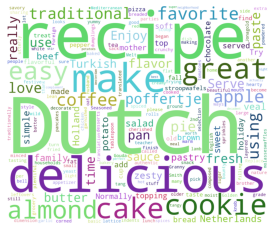

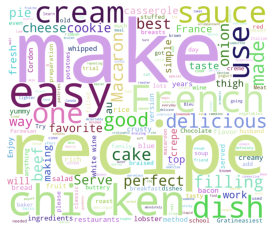

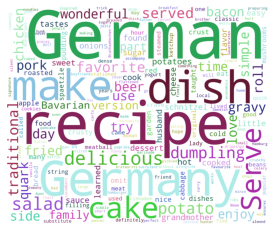

<Figure size 432x288 with 0 Axes>

In [17]:
# 9. For each recipe type (collection): Make wordclouds for interesting columns in the joint pandas dataframe

### Visualise recipe descriptions
# loop over collections
for collection in recipes_df['collection'].unique():

    # extract recipes for each particular collection
    recipes_df_subset = recipes_df[recipes_df['collection']==collection]
    
    # make a wordcloud for that particular collection
    funcs.make_wordclouds(column_name='description', recipes_df=recipes_df_subset, random_color_func=funcs.random_color_func,
                     filename_keyword=collection)

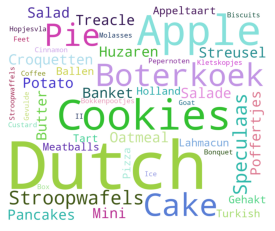

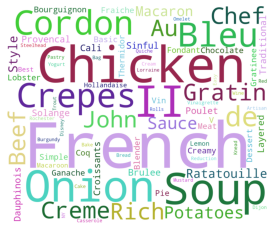

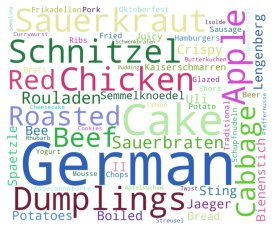

<Figure size 432x288 with 0 Axes>

In [18]:
### Visualise titles
# loop over collections
for collection in recipes_df['collection'].unique():

    # extract recipes for each particular collection
    recipes_df_subset = recipes_df[recipes_df['collection']==collection]
    
    # make a wordcloud for that particular collection
    funcs.make_wordclouds(column_name='title', recipes_df=recipes_df_subset, random_color_func=funcs.random_color_func,
                     filename_keyword=collection)

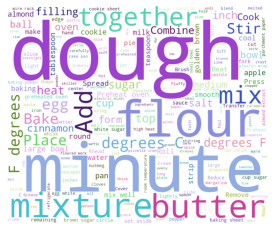

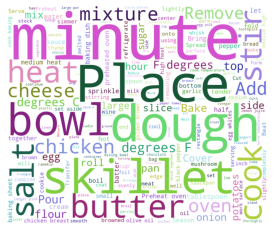

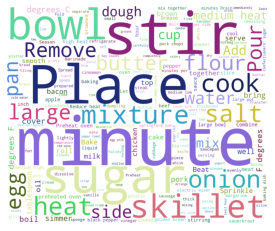

<Figure size 432x288 with 0 Axes>

In [19]:
### Visualise method steps
# loop over collections
for collection in recipes_df['collection'].unique():

    # extract recipes for each particular collection
    recipes_df_subset = recipes_df[recipes_df['collection']==collection]
    
    # make a wordcloud for that particular collection
    funcs.make_wordclouds(column_name='steps_string', recipes_df=recipes_df_subset, random_color_func=funcs.random_color_func,
                     filename_keyword=collection)

In [20]:
### Visualise ingredients

# make a new column which will store ingredient_names as a comma-separated string rather than a list
# this will enable wordclouds to work (can't do that with lists)

# recipes_df['ingredient_names'] = recipes_df['ingredient_names'].apply(lambda x: x[1:-1])
# this doesn't do anything - why??

recipes_df['ingredient_names'] = recipes_df['ingredient_names'].apply(lambda x: ', '.join([str(i) for i in x]))
recipes_df

,title,date_published,description,avg_rating,total_ratings,recipe_cats,5 stars,4 stars,3 stars,2 stars,1 star,review_number,video_present,photo_count,prepTime,cookTime,totalTime,ingredients_no,ingredient_names,steps_no,steps_string,steps_words_no,nutrition.calories,nutrition.carbohydrateContent,nutrition.cholesterolContent,nutrition.fatContent,nutrition.fiberContent,nutrition.proteinContent,nutrition.saturatedFatContent,nutrition.servingSize,nutrition.sodiumContent,nutrition.sugarContent,nutrition.transFatContent,nutrition.unsaturatedFatContent,collection
recipe_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11433,Banket,1998-12-04,My husband's family is Dutch and this is a rec...,4.71014,69,"[World Cuisine Recipes, European, Dutch]",52,16,0,0,1,55,0,7,0,0,0,9,"all-purpose flour, butter, water, almond paste...",5,"In a large bowl, cut cold butter or margarine ...",125,201.7 calories,21 g,35.8 mg,12.1 g,1 g,3.1 g,5.4 g,None,64.1 mg,6.3 g,None,None,Dutch
68583,Dutch Croquetten,2019-04-04,This yummy Dutch snack is sure to please! Sea...,3.7037,27,"[World Cuisine Recipes, European, Dutch]",11,6,3,5,2,24,0,3,15,10,25,18,"lean veal, butter, all-purpose flour, milk, ch...",4,Place ground veal in a skillet over medium hea...,216,338.6 calories,25.4 g,93.4 mg,17.8 g,1.4 g,18.6 g,8.7 g,None,595.3 mg,2.8 g,None,None,Dutch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142881,German Schwenkbraten,2020-06-19,This was a family favorite when we were statio...,4.59091,22,"[World Cuisine Recipes, European, German]",15,6,0,1,0,17,0,2,15,20,35,12,"onions wedges, vegetable oil, cloves garlic cr...",5,Place the onion wedges in a bowl. Use a large...,126,648.9 calories,16.3 g,110.3 mg,47.6 g,4.1 g,38.5 g,11.6 g,None,109 mg,6.1 g,None,None,German
84725,German Semolina Pudding,2020-06-19,This is a delicious traditional German dessert...,4.73684,19,"[World Cuisine Recipes, European, German]",14,5,0,0,0,14,0,2,2,20,22,3,"milk, white sugar, semolina",1,"In a small saucepan, stir together the milk an...",75,258.5 calories,41.1 g,19.5 mg,5.1 g,1.1 g,11.6 g,3.1 g,None,100.3 mg,21.3 g,None,None,German


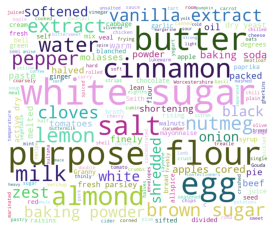

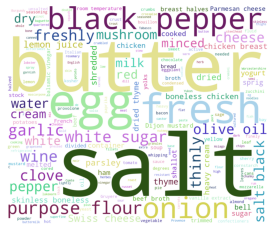

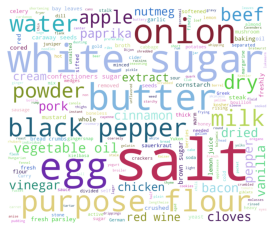

<Figure size 432x288 with 0 Axes>

In [21]:
### Visualise ingredients
# loop over collections
for collection in recipes_df['collection'].unique():

    # extract recipes for each particular collection
    recipes_df_subset = recipes_df[recipes_df['collection']==collection]
    
    # make a wordcloud for that particular collection
    funcs.make_wordclouds(column_name='ingredient_names', recipes_df=recipes_df_subset, random_color_func=funcs.random_color_func,
                     filename_keyword=collection)

## Steps 6 & 7 starting from a file that contains all recipe html pages

In [ ]:
# 6. For each recipe type (collection): Read in the file that contains html recipes

# Let's be lazy for now and ignore this, just use recipe_pages_by_collection_dict as input for future things
with open('data/practice_ids_rnd_1000_html', 'r') as f:
    all_pages = f.read()
    
sep = '<!DOCTYPE html>'
page_list = [sep+x for x in all_pages.split(sep) if x]
page_list = [BeautifulSoup(item) for item in page_list]
type(page_list[0])

In [31]:
page_list = load_html_pages_from_file('data/practice_ids_rnd_1000_html')

NameError: name 'load_html_pages_from_file' is not defined

In [30]:
# 7. Starting from "page_list" read in from a previously saved file

print('Number of recipes in this collection: ', len(page_list))
print('Recipe_ids below:\n')

recipe_dfs_dict = {}

# loop through recipes within a collection
for page in page_list:
    
    page = BeautifulSoup(page)

    # extract info from json
    recipe_info_df = funcs.extract_info_from_json_on_page_to_df(page)

    # create pandas df's for bits of useful information
    key_info_df = funcs.extract_key_info(recipe_info_df)

    recipe_id = key_info_df.loc[0]['recipe_id']
    print(recipe_id)

    times_df = funcs.extract_times(recipe_info_df)
    ingredients_df = funcs.extract_ingredients(recipe_info_df)
    steps_df = funcs.extract_method_steps(recipe_info_df)
    nutrition_df = funcs.extract_nutritional_info(recipe_info_df)

    # extract stuff directly from html
    stars_and_reviews_df = funcs.extract_stars_and_review_info(page)
    multimedia_df = funcs.extract_multimedia_info(page)

    # incorporate the mini sub-df's into a list (eventually we'll make them into one master df)
    # BTW it's way more efficient to not iterative grow a df!
    # https://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-then-filling-it
    recipe_dfs_list = [key_info_df, stars_and_reviews_df, multimedia_df, times_df,
                       ingredients_df, steps_df, nutrition_df]

    # add the list of mini df's to a dictionary. Key = recipe_id, value = list of mini df's for that recipe       
    dict_key = recipe_id
    dict_value = recipe_dfs_list
    recipe_dfs_dict[dict_key] = dict_value

Number of recipes in this collection:  872
Recipe_ids below:

15296
23130
14640
12330
16114
13440
18538
15114
22801
14993
23443
18537
19576
20846
14099
10501
13418


AttributeError: 'NoneType' object has no attribute 'string'

In [29]:
page_list[0]

'<!DOCTYPE html>\n<html lang="en">\n<head>\n<title>Sour Cream Cut-Out Cookies Recipe | Allrecipes</title>\n<meta charset="utf-8"/>\n<link href="/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>\n<link href="/img/favicons/favicon-32.png" rel="icon" sizes="32x32"/>\n<meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n<link href="/img/favicons/favicon-57.png" rel="apple-touch-icon"/>\n<link href="/img/favicons/favicon-57.png" rel="apple-touch-icon" sizes="57x57"/>\n<link href="/img/favicons/favicon-72.png" rel="apple-touch-icon" sizes="72x72"/>\n<link href="/img/favicons/favicon-76.png" rel="apple-touch-icon" sizes="76x76"/>\n<link href="/img/favicons/favicon-114.png" rel="apple-touch-icon" sizes="114x114"/>\n<link href="/img/favicons/favicon-120.png" rel="apple-touch-icon" sizes="120x120"/>\n<link href="/img/favicons/favicon-144.png" rel="apple-touch-icon" sizes="144x144"/>\n<link href="/img/favicons/favicon-152.png" rel="apple-touch-icon" sizes="152x152"/>\n<link h

In [ ]:
# append the dictionary for one collection to the master dictionary that covers all collections
dict_key = collection
dict_value = recipe_dfs_dict
all_collections_dict[dict_key] = dict_value

# Scraping lots of recipes by their id's